# Advanced Calculus with SageMath - Chapter 7

## Stokes' Theorem

This notebook contains Chapter 7 from the main Advanced Calculus with SageMath notebook.

For the complete course, please refer to the main notebook: `Advanced Calculus with SageMath.ipynb`


In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 7: Stokes' Theorem

### Stokes' Theorem Statement

For a surface S with boundary curve C:

$$\oint_C \vec{F} \cdot d\vec{r} = \iint_S (\nabla \times \vec{F}) \cdot \vec{n} \, dS$$

This relates the circulation of a vector field around a closed curve to the flux of its curl through any surface bounded by that curve.

In [24]:
var('x y z u v t')
from sage.misc.latex import LatexExpr

pretty_print(LatexExpr(r"\textbf{STOKES' THEOREM}"))
pretty_print(LatexExpr(r"\text{Vector field: } \vec{F} = "), vector([y, -x, z**2]))

# curl F
F_stokes = vector([y, -x, z**2])
curl_F = vector([
    diff(F_stokes[2], y) - diff(F_stokes[1], z),
    diff(F_stokes[0], z) - diff(F_stokes[2], x),
    diff(F_stokes[1], x) - diff(F_stokes[0], y)
])
pretty_print(LatexExpr(r"\nabla \times \vec{F} = "), curl_F)

# Surface: disk z=1, 0<=u<=2, 0<=v<=2π
pretty_print(LatexExpr(r"\text{Surface: } \vec{r}(u,v)=(u\cos v,\,u\sin v,\,1),\; 0\le u\le 2,\; 0\le v\le 2\pi"))

disk_x, disk_y, disk_z = u*cos(v), u*sin(v), 1
r_u_disk = vector([cos(v), sin(v), 0])
r_v_disk = vector([-u*sin(v), u*cos(v), 0])
normal_disk = r_u_disk.cross_product(r_v_disk)
pretty_print(LatexExpr(r"\vec{n} = "), normal_disk)

curl_on_disk = curl_F.subs({x: disk_x, y: disk_y, z: disk_z})
pretty_print(LatexExpr(r"(\nabla \times \vec{F})\big|_{\text{surface}} = "), curl_on_disk)

curl_dot_normal = curl_on_disk.dot_product(normal_disk).simplify_full()
pretty_print(LatexExpr(r"(\nabla \times \vec{F}) \cdot \vec{n} = "), curl_dot_normal)

# Nested integrals
surface_integral = integrate(integrate(curl_dot_normal, v, 0, 2*pi), u, 0, 2)
pretty_print(LatexExpr(r"\iint_S (\nabla \times \vec{F})\cdot \vec{n}\,dS = " + latex(surface_integral)))

# Boundary curve
boundary_x, boundary_y, boundary_z = 2*cos(t), 2*sin(t), 1
dx_dt, dy_dt, dz_dt = diff(boundary_x, t), diff(boundary_y, t), diff(boundary_z, t)
F_on_boundary = F_stokes.subs({x: boundary_x, y: boundary_y, z: boundary_z})
pretty_print(LatexExpr(r"\vec{F}\big|_{C} = "), F_on_boundary)

dr_dt = vector([dx_dt, dy_dt, dz_dt])
line_integrand = F_on_boundary.dot_product(dr_dt).simplify_full()
pretty_print(LatexExpr(r"\vec{F}\cdot \frac{d\vec{r}}{dt} = "), line_integrand)

line_integral_stokes = integrate(line_integrand, t, 0, 2*pi)
pretty_print(LatexExpr(r"\oint_C \vec{F}\cdot d\vec{r} = " + latex(line_integral_stokes)))

# Comparison
pretty_print(LatexExpr(r"\text{Line} = " + latex(line_integral_stokes) + r",\quad \text{Surface} = " + latex(surface_integral)))
if line_integral_stokes == surface_integral:
    pretty_print(LatexExpr(r"\text{Stokes' theorem VERIFIED! }(\text{both }=-8\pi)"))
else:
    pretty_print(LatexExpr(r"\text{Results don't match - check calculations}"))

\textbf{STOKES' THEOREM}

\text{Vector field: } \vec{F} =  (y, -x, z^2)

\nabla \times \vec{F} =  (0, 0, -2)

\text{Surface: } \vec{r}(u,v)=(u\cos v,\,u\sin v,\,1),\; 0\le u\le 2,\; 0\le v\le 2\pi

\vec{n} =  (0, 0, u*cos(v)^2 + u*sin(v)^2)

(\nabla \times \vec{F})\big|_{\text{surface}} =  (0, 0, -2)

(\nabla \times \vec{F}) \cdot \vec{n} =  -2*u

\iint_S (\nabla \times \vec{F})\cdot \vec{n}\,dS = -8 \, \pi

\vec{F}\big|_{C} =  (2*sin(t), -2*cos(t), 1)

\vec{F}\cdot \frac{d\vec{r}}{dt} =  -4

\oint_C \vec{F}\cdot d\vec{r} = -8 \, \pi

\text{Line} = -8 \, \pi ,\quad \text{Surface} = -8 \, \pi

\text{Stokes' theorem VERIFIED! }(\text{both }=-8\pi)

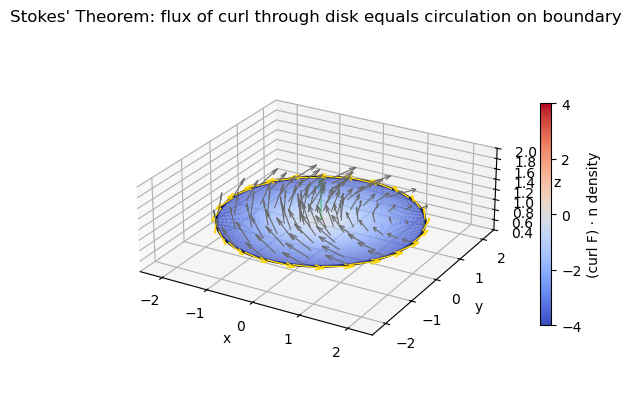

In [4]:
# Fixed: use symmetric TwoSlopeNorm around 0 to avoid vmin<vcenter<vmax violation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors

# Disk parameterization
n_u, n_v = 80, 180
U = np.linspace(0, 2.0, n_u)
V = np.linspace(0, 2*np.pi, n_v)
U, V = np.meshgrid(U, V)

X = U * np.cos(V)
Y = U * np.sin(V)
Z = np.ones_like(X)

# Curl(F) = (0,0,-2); normal (unnormalized) = (0,0,U) => density = -2U
density = -2.0 * U
cmap = cm.coolwarm
M = float(np.max(np.abs(density))) or 1.0  # safe guard if all zeros
norm = mcolors.TwoSlopeNorm(vmin=-M, vcenter=0.0, vmax=M)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface colored by curl · n density
ax.plot_surface(X, Y, Z, facecolors=cmap(norm(density)), rstride=1, cstride=1,
                edgecolor='none', shade=False, alpha=0.9)

# Boundary curve (circle) and its positive orientation arrows
tb = np.linspace(0, 2*np.pi, 200)
xb, yb, zb = 2*np.cos(tb), 2*np.sin(tb), np.ones_like(tb)
ax.plot(xb, yb, zb, color='k', lw=2)

t_ar = np.linspace(0, 2*np.pi, 24, endpoint=False)
ax.quiver(2*np.cos(t_ar), 2*np.sin(t_ar), np.ones_like(t_ar),
          -np.sin(t_ar), np.cos(t_ar), 0*t_ar,
          length=0.6, normalize=True, color='gold', linewidths=1)

# Vector field F(x,y,1) = (y,-x,1) sampled on the disk
r_samples = np.linspace(0.4, 2.0, 6)
th_samples = np.linspace(0, 2*np.pi, 16, endpoint=False)
RR, TT = np.meshgrid(r_samples, th_samples)
xs = (RR*np.cos(TT)).ravel()
ys = (RR*np.sin(TT)).ravel()
zs = np.ones_like(xs)
Fx, Fy, Fz = ys, -xs, np.ones_like(xs)
ax.quiver(xs, ys, zs, Fx, Fy, Fz, length=0.5, normalize=True, color='dimgray', linewidths=0.8)

# Upward normal at the center
ax.quiver(0, 0, 1, 0, 0, 1, length=0.8, color='limegreen')

# Colorbar for density
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(density)
cbar = fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.08)
cbar.set_label("(curl F) · n density")

# Aesthetics
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Stokes' Theorem: flux of curl through disk equals circulation on boundary")
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(0.4, 2.0)
ax.set_box_aspect((1, 1, 0.35))
ax.view_init(elev=25, azim=-60)

plt.show()

---

## **Continuing Your Learning Journey**

You've completed **Stokes' Theorem**! The concepts you've mastered here form essential building blocks for what comes next.

**Ready for Real-World Applications and Modeling?**

In Chapter 8, we'll build upon these foundations to explore even more fascinating aspects of the subject. The knowledge you've gained here will directly apply to the advanced concepts ahead.

### **What's Next**

Chapter 8 will expand your understanding by introducing new techniques and applications that leverage everything you've learned so far.

**[Continue to Chapter 8: Real-World Applications and Modeling →](https://cocalc.com/share/public_paths/cd646cf880be993d7534cfdec099876db7e52974)**

*or*

**[Return to Complete Course](https://cocalc.com/share/public_paths/ab3ad2f15d8989653377cbfdc238a82399b2633f)**